Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, завдання буде оцінена максимум у половину балів.

Під час виконання вам дозволено користуватися будь-якими зручними для вас Python бібліотеками для візуалізації.

# I. Receiving Data.

In [1]:
# cell for imports. All imports must go here.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. (2б) Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою titanic ([train.csv](https://www.kaggle.com/c/titanic/data?select=train.csv)). Зчитайте його та збережіть його у змінну, щоб у подальшому її використати для візуалізацій. Виведіть інформацію про кожну колонку, її індекс, тип та кількість непропущених значень та перші кілька рядків датафрейму.


In [2]:
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# IІ. Data Visualization.

2. (10б) Створіть pie chart, який би показував співвідношення виживших до загиблих.

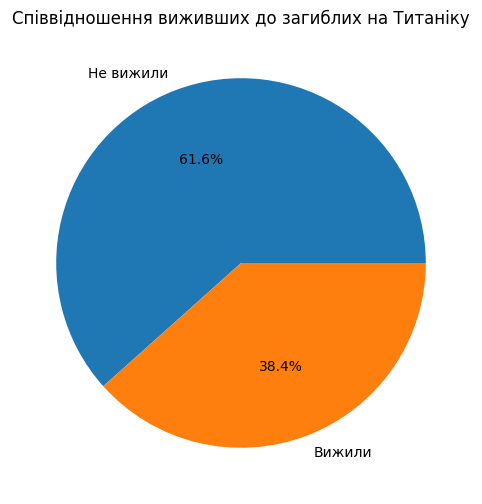

In [6]:
survived = df['Survived'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(survived, labels=['Не вижили', 'Вижили'], autopct='%1.1f%%')
plt.title('Співвідношення виживших до загиблих на Титаніку')
plt.show()

З отриманої візуалізації бачимо, що більша частина(61.6%) людей загинула під час катастрофи

3. (20б) Створіть bar chart, який би показував співвідношення загиблих до виживших для кожної статі. Для groupby використовуйте атрибут as_index=False.


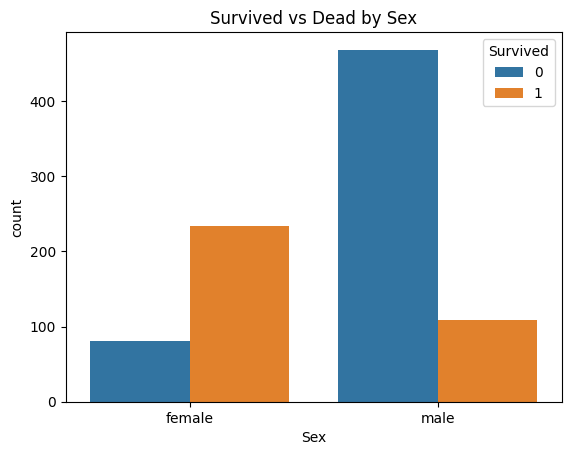

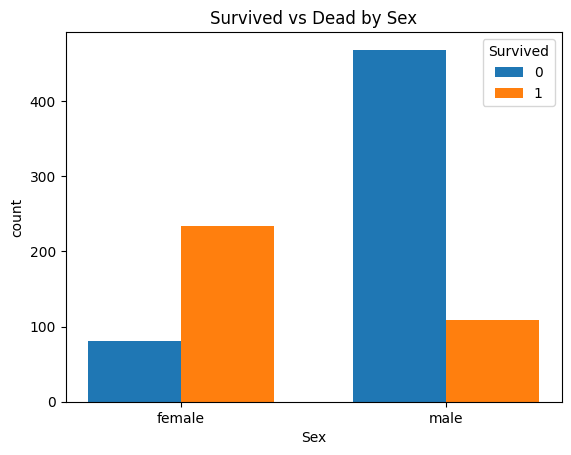

In [9]:
survived_by_sex = df.groupby(['Sex', 'Survived'], as_index=False).size()

surv = survived_by_sex[survived_by_sex['Survived'] == 1]
dead = survived_by_sex[survived_by_sex['Survived'] == 0]

categories = ['female', 'male']
x = np.arange(len(categories))

bar_width = 0.35
bar_positions1 = np.arange(len(categories))
bar_positions2 = bar_positions1 + bar_width


plt.xticks(x + bar_width/2, categories)
plt.bar(bar_positions1, dead['size'], width=bar_width, label='0')
plt.bar(bar_positions2, surv['size'], width=bar_width, label='1')


plt.xlabel('Sex')
plt.ylabel('count')
plt.title('Survived vs Dead by Sex')
plt.legend(title='Survived')
plt.show()

 З візуалізації бачимо що і абсолютно і у відсотковому співвідношенні кількість виживших жінок перевищує кількість виживших чоловіків

4. (20б) Відобразіть кількість пропущених значень в датасеті по кожній із змінних.

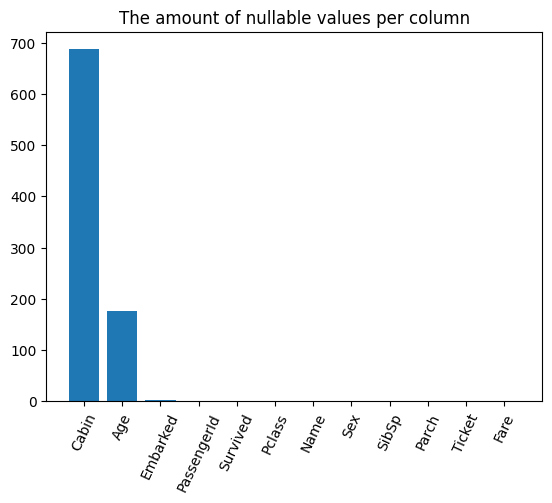

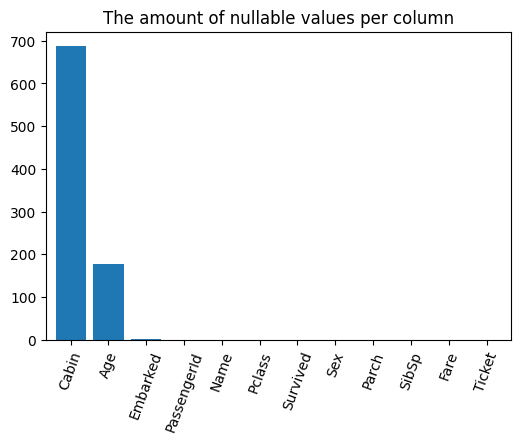

In [11]:
missing_values = df.isnull().sum().sort_values(ascending=False)
plt.figure(figsize=(6, 4))
missing_values.plot(kind='bar', width=0.8)
plt.title('The amount of nullable values per column')
plt.xticks(rotation=70)
plt.show()

З візуалізації бачимо, що найбільше пропущених значень в змінній Cabin, потім іде змінна Age і також певна пропущена незначна кількість в Embarked

5. (10б) Побудуйте наступний графік, дайте йому назву та опишіть, що власне на них відображається.

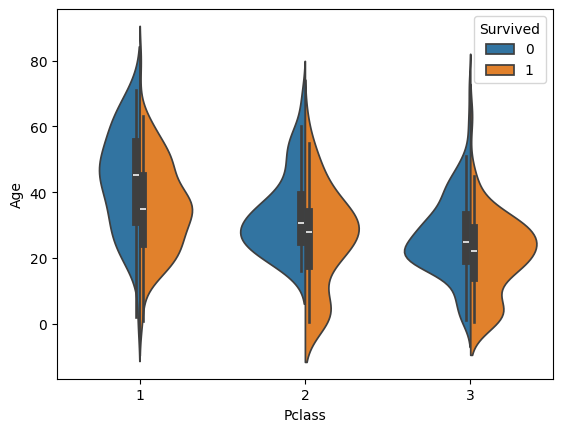

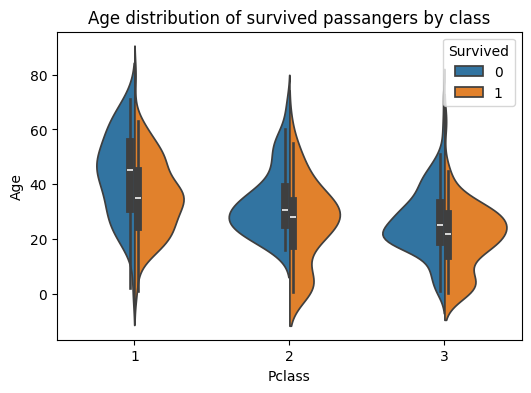

In [15]:
titanic_data = df[['Pclass', 'Age', 'Survived']]
plt.figure(figsize=(6, 4))
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=titanic_data, split=True)
plt.title('Age distribution of survived passangers by class')
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.show()

На даній візуалізації бачимо розподіл пасажирів на три класи кают де в свою чергу кожен клас поділений на виживших і загиблих пасажирів відповідно до їх віку. В середині графіків білою точкою зображається медіана віку пасажирів і як бачимо по всіх 3 класах що вік виживших людей менший за вік людей що загинули, а також вік людей зменшується у порядку зменшення їх класу кают

6. (13б) Побудуйте графік розподілу частот по віку пасажирів.


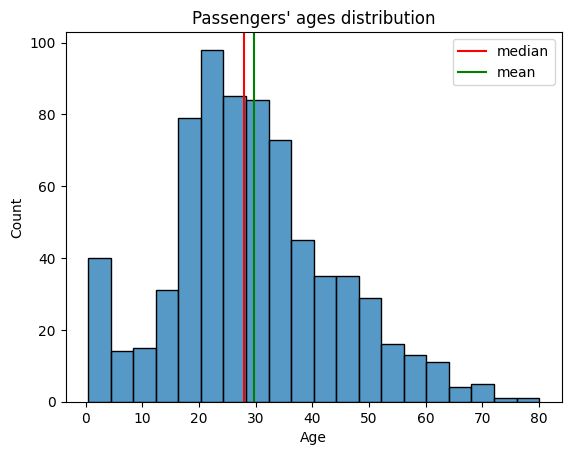

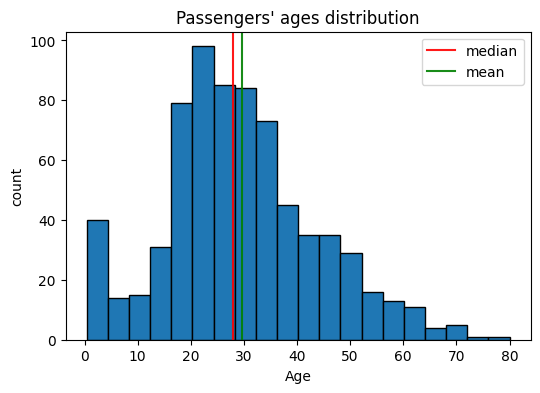

In [16]:
plt.figure(figsize=(6, 4))
hist = plt.hist(df['Age'].dropna(), bins=20, edgecolor='black')

mean = np.mean(df['Age'].dropna())
median = np.median(df['Age'].dropna())

plt.axvline(median, linewidth=1.5, color='r', alpha=0.9, linestyle='-', label = 'median')
plt.axvline(mean, linewidth=1.5, color='g', alpha=0.9, linestyle='-', label = 'mean')

plt.title('Passengers\' ages distribution')
plt.xlabel('Age')
plt.ylabel('count')
plt.legend()
plt.show()

З гістограми бачимо що найбільше пасажирів було віком від десь 20 років до 30 років. Середній вік пасажирів дорівнює майже 30 рокам, в той час як медіана приблизно 28 років

7. (25б) Поставте бізнес-питання до даних. Дайте на нього відповідь за допомогою візуалізацій. Прокоментуйте отриману відповідь.

Середня ціна квитка по кожному класу каюти та портом посадки  

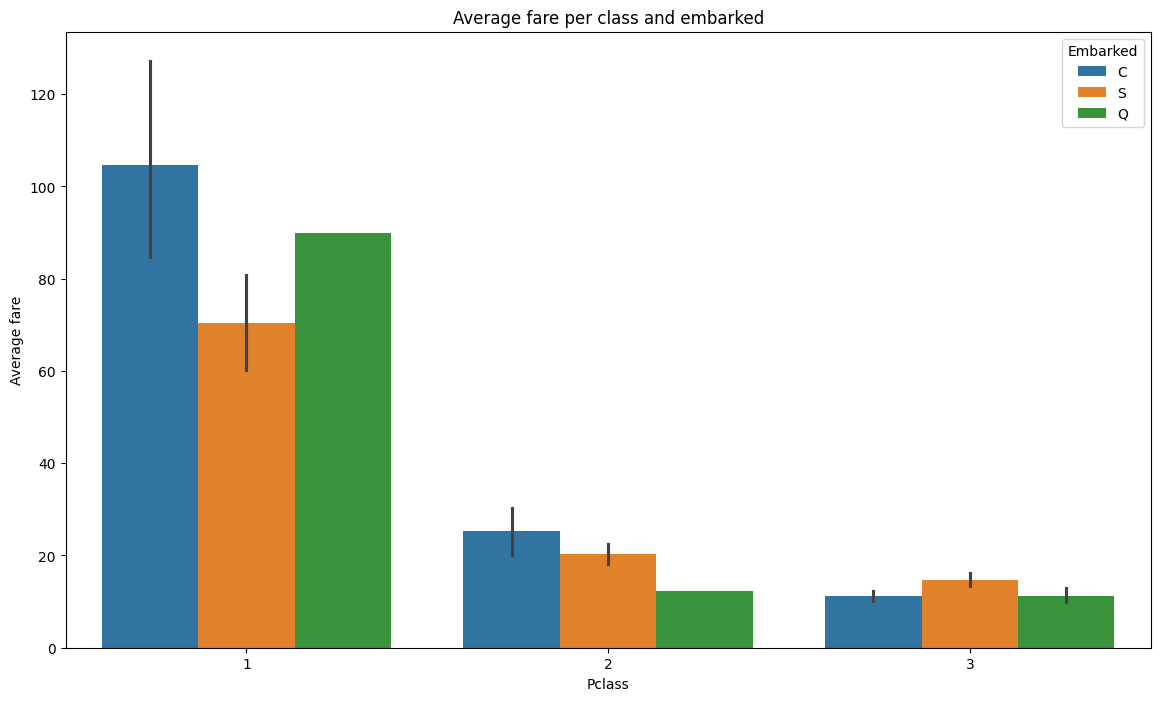

In [20]:
plt.figure(figsize=(14, 8))
sns.barplot(x='Pclass', y='Fare', hue='Embarked', data=df, estimator=np.mean)
plt.title('Average fare per class and embarked')
plt.ylabel('Average fare')
plt.xlabel('Pclass')
plt.legend(title='Embarked')
plt.show()

З візуалізації бачимо що квитки в 3 клас коштували приблизно однаково в усіх портах, в той час як кватики в першому класів і в другому значно дорожче були в порті Cherbourg

# Вітаю! Ви велика(ий) молодець, що впоралась(вся). Похваліть себе та побалуйте чимось приємним. Я Вами пишаюся.

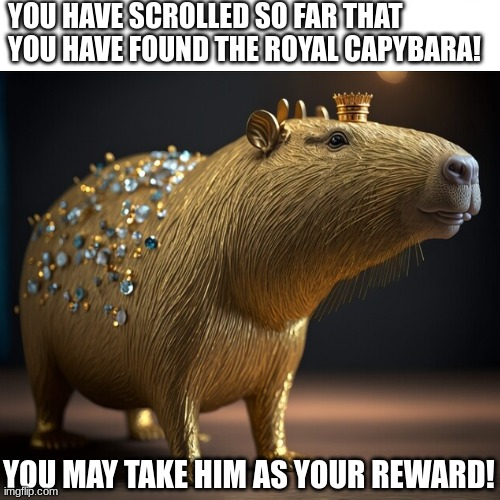